# Week 4 Exercise with Numpy
*Use only numpy in these exercises*

## Exercise 1
1) **Open the file './befkbhalderstatkode.csv'**  

2) **Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)**

In [3]:
import numpy as np

filename = './befkbhalderstatkode.csv'
ds = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

3) **Using this data:  
(neighb)  
Find out how many people lived in each of the 11 areas in 2015**

In [88]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}
# AAR,BYDEL,ALDER,STATKODE,PERSONER
result3 = {}.fromkeys(neighb.keys())

for key in neighb.keys():
    #mask3 = (ds[:, 0] == 2015) & (ds[:,1] == key)
    #aar:2015, bydel:key
    neighbourhood_data = ds[(ds[:,0] == 2015) & (ds[:,1] == key)]
    sum_of_people = neighbourhood_data[:,4].sum()
    #print(neighbourhood_data)
    #print(sum_of_people)
    result3[key] = sum_of_people #assign value
print(result3)

#Make a version easier for reading
#convert from number:count to name:count
result3_named= {neighb[k]:v  for k, v in result3.items()}

for key, value in result3_named.items():
    print(f"{key} har {value} indbyggere")

{1: 51937, 2: 75113, 3: 78802, 4: 61623, 5: 51727, 6: 39537, 7: 43908, 8: 53604, 9: 55205, 10: 64967, 99: 3872}
Indre By har 51937 indbyggere
Østerbro har 75113 indbyggere
Nørrebro har 78802 indbyggere
Vesterbro/Kgs. Enghave har 61623 indbyggere
Valby har 51727 indbyggere
Vanløse har 39537 indbyggere
Brønshøj-Husum har 43908 indbyggere
Bispebjerg har 53604 indbyggere
Amager Øst har 55205 indbyggere
Amager Vest har 64967 indbyggere
Udenfor har 3872 indbyggere


4) **Make a bar plot to show the size of each city area from the smallest to the largest**

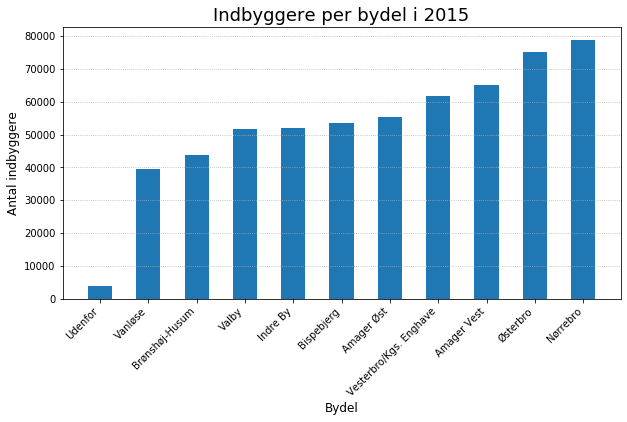

In [107]:
import matplotlib.pyplot as plt
#sort asc
sorted_result3 = {k: v for k, v in sorted(
        result3_named.items(), key=lambda item: item[1])}

#setup
plt.figure(figsize=[10,5])
plt.bar(sorted_result3.keys(), sorted_result3.values(),
            width=0.5, zorder=0)
#labels
title = 'Indbyggere per bydel i 2015'
plt.title(title, fontsize=18)
plt.xlabel("Bydel", fontsize=12)
plt.ylabel("Antal indbyggere", fontsize=12)
#grid, misc
plt.grid(axis='y', linestyle='dotted', zorder=3)
plt.xticks(rotation=45, ha="right")
plt.show()

5) **Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015**

In [121]:
# AAR,BYDEL,ALDER,STATKODE,PERSONER
result5 = ds[(ds[:,0] == 2015) & (ds[:,2] > 65)]
print('Total amount of people over the age of 65 in Copenhagen in the year 2015:\n', result5[:,4].sum())

Total amount of people over the age of 65 in Copenhagen in the year 2015:
 55750


6) **How many of those were from the other nordic countries (not dk)**

In [139]:
countries_of_interest = [5110, 5120, 5104, 5105, 5106, 5101, 5901, 5902]
result6 = result5[(np.isin(result5[:,3], countries_of_interest))]
print('Amount of nordic foreigners over the age of 65 in Copenhagen in the year 2015:\n', result6[:,4].sum())

Amount of nordic foreigners over the age of 65 in Copenhagen in the year 2015:
 610


7) **Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015**

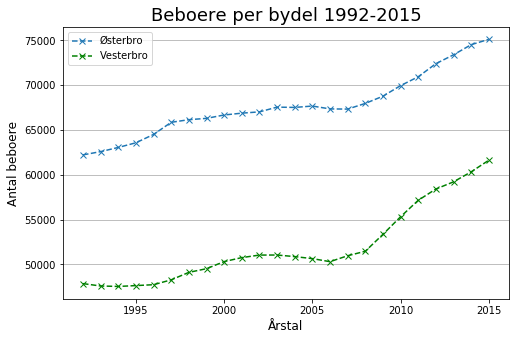

In [197]:
# AAR,BYDEL,ALDER,STATKODE,PERSONER
#2: 'Østerbro',
#4: 'Vesterbro/Kgs. Enghave',

#returns sum of persons in for [year y] in [zone x] for requested year range. Will be used as plot points.
østerbro = np.array(
        [np.sum(ds[((ds[:,0] == year) & (ds[:, 1] == 2))][:, 4]) for year in range(1992,2016)])
vesterbro = np.array(
        [np.sum(ds[((ds[:,0] == year) & (ds[:, 1] == 4))][:, 4]) for year in range(1992,2016)])
#print("øst", østerbro)
#print("vest", vesterbro)

#setup
plt.figure(figsize=[8,5])
years = range(1992, 2016)
plt.plot(list(years), list(østerbro), label="Østerbro", linestyle="--", marker="x")
plt.plot(list(years), list(vesterbro), label="Vesterbro", linestyle="--", marker="x", c='green')

#labels
title = 'Beboere per bydel 1992-2015'
plt.title(title, fontsize=18)
plt.xlabel("Årstal", fontsize=12)
plt.ylabel("Antal beboere", fontsize=12)
#grid, misc
plt.grid(axis="y")
plt.legend()
plt.show()